<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/12_29_openCV02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### OpenCV
- Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python


In [3]:
!pwd

/content


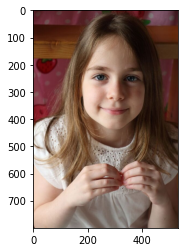

True

In [5]:
## 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2

filepath = '/content/drive/MyDrive/Colab Notebooks/girl.png'
img = cv2.imread(filepath)
# plt.axis('off)  ## axis 출력 끄기
# OpenCV BGR(파녹빨) 인 반면 matplotlib RGB(빨녹파) 순서

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  ## 이미지 출력
plt.show()

# 이미지 저장하기
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/girl1.png', img)

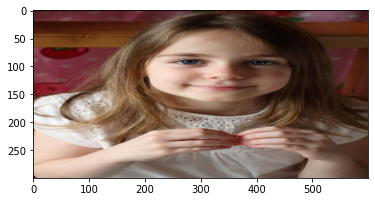

In [8]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
filepath = '/content/drive/MyDrive/Colab Notebooks/girl.png'
img = cv2.imread(filepath)
# plt.axis('off')
# 이미지 크기 변경하기
im2 = cv2.resize(img, (600, 300))  ## img,(width, height)
# 크기 변경한 이미지 저장하기
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/out-resize.png', im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

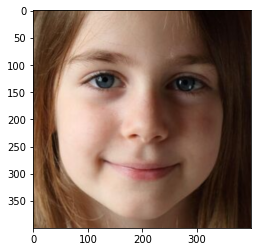

In [9]:
# 이미지 읽어 들이기
filepath = '/content/drive/MyDrive/Colab Notebooks/girl.png'
img = cv2.imread(filepath)
# plt.axis('off')

# 이미지 자르기
im3 = img[150:450, 150:450]  ## y1:y2, x1:x2

# 이미지 크기 변경하기
im3 = cv2.resize(im3, (400, 400))

# 크기 변경한 이미지 저장하기
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/cut-resize.png', im3)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
plt.show()

#### 얼굴 검출 - 자동으로 얼굴에 모자이크 처리
- 인간의 얼굴이 어디 있는지 검출
- 사람의 얼굴을 검출하고 자동으로 모자이크 처리\
사생활 보호를 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리\
얼굴 인식을 사용해 사람 얼굴이 있는 사진을 자동으로 수집


[얼굴 검출 캐스케이드-얼굴 요소 데이터베이스]

https://github.com/opencv/opencv/tree/master/data/haarcascades


얼굴의 좌표= 149 127 316 316


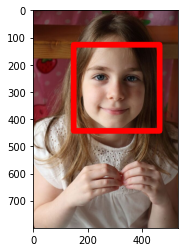

In [10]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기
# OpenCV는 Haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴 요소 DB)를 사용해 눈, 코, 잎과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# 얼굴 검출 전용 캐스케이드 파일 외 정면 얼굴, 웃는 얼굴, 눈, 몸 전체를 검출하는 다양한 캐스케이드 파일
cascade_file = "/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스캐이드 파일을 지정해 다양한 물체 검출


# 이미지를 읽어 들이고 그레이스케일로 변환하기
# 밝은 부분은 흰색, 어두운 부분은 검은색. 코는 밝은 부분, 코의 양옆은 어두운 부분
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단. 각 요소의 명암패턴을 결합해 얼굴의 형태 확인
filepath = '/content/drive/MyDrive/Colab Notebooks/girl.png'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# 얼굴 인식하기 (cascade.detectMultiScale() 메서드를 사용)
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))  ## 그레이스케일 이미지데이터, 얼굴 인식영역의 최소 크기 지정


# 결과 확인하기
if len(face_list) == 0:   ## 검출 결과를 확인 후 리스트가 비어 잇으면 메시지 출력 후 종료
    print('얼굴 인식 실패')
    quit()


# 인식한 부분 표시하기  ## 검출한 얼굴 영역에 붉은색 테두리를 랜더링
for (x,y,w,h) in face_list:
     print('얼굴의 좌표=', x,y,w,h)
     red = (0,0,255)
     cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=20)


# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [11]:
# 모자이크 처리하기
# 모듈 직접 만들기
# mosaic.py
import cv2

def mosaic(img, rect, size):
  # 모자이크 적용할 부분 추출하기
  (x1,y1,x2,y2) = rect
  w = x2 - x1
  h = y2 - y1
  i_rect = img[y1:y2, x1:x2]

  # 축소하고 확대하기
  i_small = cv2.resize(i_rect, (size, size))
  i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA) ## 보간법
  # 모자이크 적용하기
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos
  return img2

In [19]:
# 모듈 업로드
!cp /content/drive/MyDrive/mosaic.py /content

In [20]:
!ls

drive  mosaic.py  sample_data


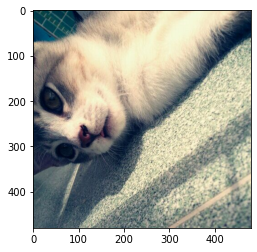

In [21]:
img = cv2.imread('/content/drive/MyDrive/cat.png')

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/cat.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

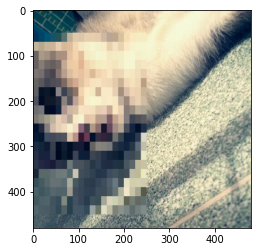

In [22]:
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어 들이고 모자이크 처리하기
img = cv2.imread('/content/drive/MyDrive/cat.png')
mos = mosaic(img, (0, 50, 250, 450), 20)

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/cat-mosaic.png', mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

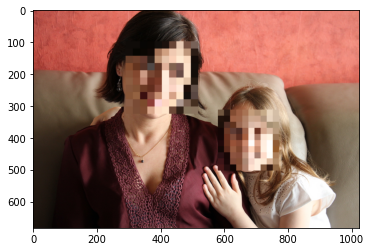

In [23]:
# 사람 얼굴에 자동으로 모자이크 처리하기
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = '/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기
img = cv2.imread('/content/drive/MyDrive/family.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
  img = mosaic(img, (x,y,x+w,y+h), 10)

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/family-mosaic.jpg', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Q. 5명 이상 얼굴 사진이 들어있는 이미지를 다운로드 받아서 모자이크 처리를 하세요.

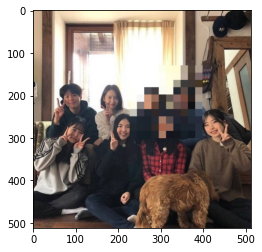

In [29]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

cascade_file = '/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread('/content/drive/MyDrive/효리네민박.jfif')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

for (x,y,w,h) in face_list:
  img = mosaic(img, (x,y,x+w,y+h), 10)

cv2.imwrite('/content/drive/MyDrive/five_people-mosaic.jpg', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

---0---
얼굴의 좌표= 135 109 352 352
---10---
얼굴의 좌표= 174 149 350 350
---20---
얼굴의 좌표= 198 177 362 362
---30---
---40---
---50---
---60---
---70---
---80---


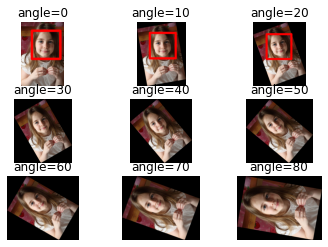

In [39]:
# OpenCV의 얼굴 검출은 옆모습과 기울어진 얼굴을 잘 검출 못함
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 검출기 생성하고 이미지 읽어 들이기
cascade_file = '/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/girl.png')

# 얼굴 검출하고 영역 표시하기
def face_detect(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))

  # 인식한 부분 표시하기
  for (x,y,w,h) in face_list:
    print('얼굴의 좌표=', x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=30)

# 여러 각도의 이미지를 만들고 테스트하기
for i in range(0,9):
    ang = i * 10
    print('---' + str(ang) + '---')
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.title('angle=' + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()